# Title
#### Vikas Thoti Reddy

## Introduction
...

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

## Data Processing and Cleaning
...

In [94]:
# loading data
appearances = pd.read_csv("data/appearances.csv")
games = pd.read_csv("data/games.csv")
players = pd.read_csv("data/players.csv")
clubs = pd.read_csv("data/clubs.csv")
competitions = pd.read_csv("data/competitions.csv")

# selecting data from the top 5 major domestic leagues and cups in Europe, Champions League, and Europa League
"""
competitions = ["CL", "EL", "GB1", "IT1", "L1", "FR1", "ES1", "DFB", "CDR", "CIT", "CGB", "FRCH"]
appearances = appearances.loc[appearances["competition_id"].isin(competitions)]
games = games.loc[games["competition_id"].isin(competitions)]
"""

print("done")

done


In [95]:
# cleaning player data
players = players[["player_id", "pretty_name", "country_of_citizenship", "foot", "height_in_cm", "date_of_birth", 
                   "position","market_value_in_gbp", "highest_market_value_in_gbp", "club_id"]]
players['date_of_birth'] = players['date_of_birth'].astype(str)
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players["age_days"] = (datetime.datetime.now() - players['date_of_birth']).astype('timedelta64[D]')
players["age_years"] = (datetime.datetime.now() - players['date_of_birth']).astype('timedelta64[Y]')
players

,player_id,pretty_name,country_of_citizenship,foot,height_in_cm,date_of_birth,position,market_value_in_gbp,highest_market_value_in_gbp,club_id,age_days,age_years
0,254016,Arthur Delalande,France,Right,186,1992-05-18,Midfield,NaN,90000.0,855,11166.0,30.0
1,51053,Daniel Davari,Iran,Right,192,1988-01-06,Goalkeeper,135000.0,1130000.0,23,12760.0,34.0
2,31451,Torsten Oehrl,Germany,Right,192,1986-01-07,Attack,NaN,1130000.0,23,13489.0,36.0
3,44622,Vladimir Kisenkov,Russia,Right,182,1981-10-08,Defender,NaN,720000.0,3691,15041.0,41.0
4,30802,Oscar Diaz,Spain,Right,183,1984-04-24,Attack,NaN,1080000.0,3302,14112.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25619,256718,Sven Van Beek,Netherlands,Right,189,1994-07-28,Defender,1000000.0,5500000.0,306,10365.0,28.0
25620,646704,Maxim Dekker,Netherlands,Left,0,2004-04-21,Defender,1500000.0,1500000.0,1090,6810.0,18.0
25621,454628,Alex Timossi Andersson,Sweden,Right,170,2001-01-19,Attack,1200000.0,1500000.0,306,7998.0,21.0
25622,462988,Danil Lipovoy,Russia,Left,177,1999-09-22,Midfield,300000.0,350000.0,2696,8483.0,23.0


In [96]:
# attatching current club team and domestic competition id to each player
clubs = clubs[["club_id", "pretty_name","domestic_competition_id"]]
clubs.columns = ["club_id", "club_name", "domestic_competition_id"]
players = players.merge(clubs, left_on='club_id', right_on='club_id')

competitions = competitions[["competition_id", "pretty_name"]]
competitions.columns = ["competition_id", "competition_name"]
players = players.merge(competitions, left_on='domestic_competition_id', right_on='competition_id')
players

,player_id,pretty_name,country_of_citizenship,foot,height_in_cm,date_of_birth,position,market_value_in_gbp,highest_market_value_in_gbp,club_id,age_days,age_years,club_name,domestic_competition_id,competition_id,competition_name
0,254016,Arthur Delalande,France,Right,186,1992-05-18,Midfield,NaN,90000.0,855,11166.0,30.0,Ea Guingamp,FR1,FR1,Ligue 1
1,225616,Paul Babiloni,France,Right,180,1990-01-16,Defender,NaN,360000.0,855,12019.0,32.0,Ea Guingamp,FR1,FR1,Ligue 1
2,45264,Thierry Argelier,France,Right,183,1986-07-08,Defender,NaN,540000.0,855,13307.0,36.0,Ea Guingamp,FR1,FR1,Ligue 1
3,6274,Gregory Cerdan,France,Right,190,1982-07-28,Defender,NaN,2250000.0,855,14748.0,40.0,Ea Guingamp,FR1,FR1,Ligue 1
4,1613,Vivian,Brazil,NaN,0,1982-04-05,Defender,NaN,1350000.0,855,14862.0,40.0,Ea Guingamp,FR1,FR1,Ligue 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,168166,Lucas Pirard,Belgium,Right,191,1995-03-10,Goalkeeper,400000.0,1500000.0,3948,10140.0,27.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25620,78570,Anthony Moris,Luxembourg,Left,186,1990-04-29,Goalkeeper,1500000.0,1500000.0,3948,11916.0,32.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25621,450958,Ross Sykes,England,Right,196,1999-03-26,Defender,700000.0,700000.0,3948,8663.0,23.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25622,338668,Senne Lynen,Belgium,Right,185,1999-02-19,Midfield,2000000.0,2000000.0,3948,8698.0,23.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League


In [97]:
# merging appearance data with player data
full_player_stats = appearances.merge(players, left_on='player_id', right_on='player_id')
full_player_stats.dropna()
full_player_stats['date'] = full_player_stats['date'].astype(str)
full_player_stats['date'] = pd.to_datetime(full_player_stats['date'])
full_player_stats = full_player_stats.sort_values("date")

# selecting data from 2019-2021, 2020-2021, 2021-2022 seasons
start_datetime = datetime.datetime(2019, 7, 30)
end_datetime = datetime.datetime(2022, 6, 1)
player_stats = full_player_stats.loc[full_player_stats["date"] > start_datetime]
player_stats = player_stats.loc[player_stats["date"] < end_datetime]

In [104]:
# summing stats for players across their appearences in selected competitions
sum_stats = ["goals", "assists", "minutes_played", "yellow_cards", "red_cards"]
player_stats_sum = player_stats.groupby("player_id")[sum_stats].sum()
player_stats_sum = player_stats_sum.sort_values("goals", ascending=False)

# capturing player info data that does not need aggregating
details = ["pretty_name", "country_of_citizenship", "foot", "height_in_cm", "club_id", "club_name", 
           "domestic_competition_id","position", "market_value_in_gbp", "highest_market_value_in_gbp",
           "age_days", "age_years", "competition_name"]
def detail(x):
    return x[0]
player_details = player_stats.groupby("player_id")[details]
player_details = player_details.agg(lambda col: np.sort(col.unique()).tolist())
for col in player_details.columns:
    player_details[col] = player_details[col].apply(detail)

# merging data into one dataframe
player_info = player_details.merge(player_stats_sum, left_index=True, right_index=True)
player_info = player_info.dropna()
player_info = player_info.sort_values("goals", ascending=False)
player_info.head(10)

,pretty_name,country_of_citizenship,foot,height_in_cm,club_id,club_name,domestic_competition_id,position,market_value_in_gbp,highest_market_value_in_gbp,age_days,age_years,competition_name,goals,assists,minutes_played,yellow_cards,red_cards
player_id,,,,,,,,,,,,,,,,,,
38253,Robert Lewandowski,Poland,Right,185,131,Fc Barcelona,ES1,Attack,45000000.0,90000000.0,12532.0,34.0,Laliga,153,26,11529,14,0
18922,Karim Benzema,France,Right,185,418,Real Madrid,ES1,Attack,35000000.0,60000000.0,12778.0,34.0,Laliga,101,35,11785,3,0
8198,Cristiano Ronaldo,Portugal,Right,187,506,Juventus Turin,IT1,Attack,27000000.0,108000000.0,13825.0,37.0,Serie A,97,14,10933,18,0
105521,Ciro Immobile,Italy,Right,185,398,Lazio Rom,IT1,Attack,23000000.0,50000000.0,11984.0,32.0,Serie A,96,21,10340,17,1
418560,Erling Haaland,Norway,Left,195,281,Manchester City,GB1,Attack,170000000.0,170000000.0,8180.0,22.0,Premier League,94,24,7590,9,0
342229,Kylian Mbappe,France,Right,178,583,Fc Paris Saint Germain,FR1,Attack,160000000.0,200000000.0,8759.0,23.0,Ligue 1,93,48,9340,19,0
148455,Mohamed Salah,Egypt,Left,175,31,Fc Liverpool,GB1,Attack,80000000.0,150000000.0,11138.0,30.0,Premier League,84,35,11945,3,0
28003,Lionel Messi,Argentina,Left,170,583,Fc Paris Saint Germain,FR1,Attack,50000000.0,180000000.0,12956.0,35.0,Ligue 1,80,55,10786,14,1
132098,Harry Kane,England,Right,188,148,Tottenham Hotspur,GB1,Attack,90000000.0,150000000.0,10730.0,29.0,Premier League,76,28,10677,11,0


## Initial Analysis
...

In [105]:
# calculate statistics per 90 and sort data
player_info["goal_contributions"] = player_info["goals"] + player_info["assists"]
player_info["goal_per_90"] = (player_info["goals"] / player_info["minutes_played"]) * 90
player_info["assist_per_90"] = (player_info["assists"] / player_info["minutes_played"]) * 90
player_info["goal_contribution_per_90"] = (player_info["goal_contributions"] / player_info["minutes_played"]) * 90
player_info = player_info.sort_values("goal_contributions", ascending=False)

# look at players that have played greater than 2160 minutes (8 games on average per season for last 3 seasons)
all_positions = player_info.loc[player_info["minutes_played"] > 2160]

# separate data by positions
attackers = all_positions.loc[all_positions["position"] == "Attack"]
midfielders = all_positions.loc[all_positions["position"] == "Midfield"]
defenders = all_positions.loc[all_positions["position"] == "Defender"]
goalkeepers = all_positions.loc[all_positions["position"] == "Goalkeeper"]

print(all_positions.columns)
print(len(all_positions))
print(len(attackers))
print(len(midfielders))
print(len(defenders))
print(len(goalkeepers))

Index(['pretty_name', 'country_of_citizenship', 'foot', 'height_in_cm',
       'club_id', 'club_name', 'domestic_competition_id', 'position',
       'market_value_in_gbp', 'highest_market_value_in_gbp', 'age_days',
       'age_years', 'competition_name', 'goals', 'assists', 'minutes_played',
       'yellow_cards', 'red_cards', 'goal_contributions', 'goal_per_90',
       'assist_per_90', 'goal_contribution_per_90'],
      dtype='object')
4447
1385
991
1717
354


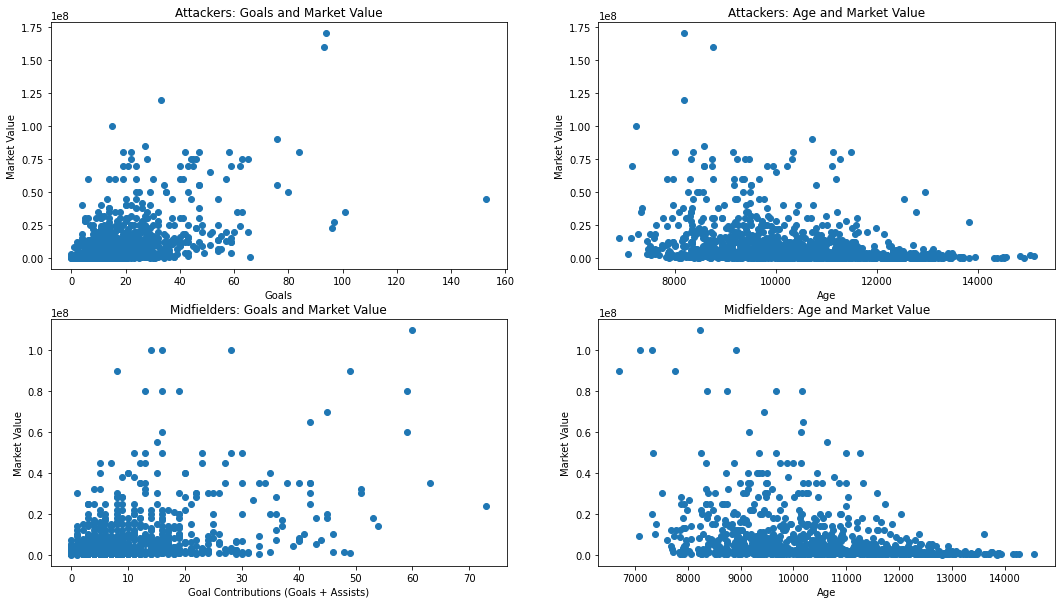

In [106]:
# plot relationship between goals/goal contributions/age and market value of attackers and midfielders

fig, axs = plt.subplots(2, 2, figsize=(18,10))

axs[0, 0].scatter(attackers["goals"], attackers["market_value_in_gbp"])
axs[0, 0].set_xlabel("Goals")
axs[0, 0].set_ylabel("Market Value")
axs[0, 0].set_title("Attackers: Goals and Market Value")

axs[0, 1].scatter(attackers["age_days"], attackers["market_value_in_gbp"])
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Market Value")
axs[0, 1].set_title("Attackers: Age and Market Value")

axs[1, 0].scatter(midfielders["goal_contributions"], midfielders["market_value_in_gbp"])
axs[1, 0].set_xlabel("Goal Contributions (Goals + Assists)")
axs[1, 0].set_ylabel("Market Value")
axs[1, 0].set_title("Midfielders: Goals and Market Value")

axs[1, 1].scatter(midfielders["age_days"], midfielders["market_value_in_gbp"])
axs[1, 1].set_xlabel("Age")
axs[1, 1].set_ylabel("Market Value")
axs[1, 1].set_title("Midfielders: Age and Market Value")

plt.show()

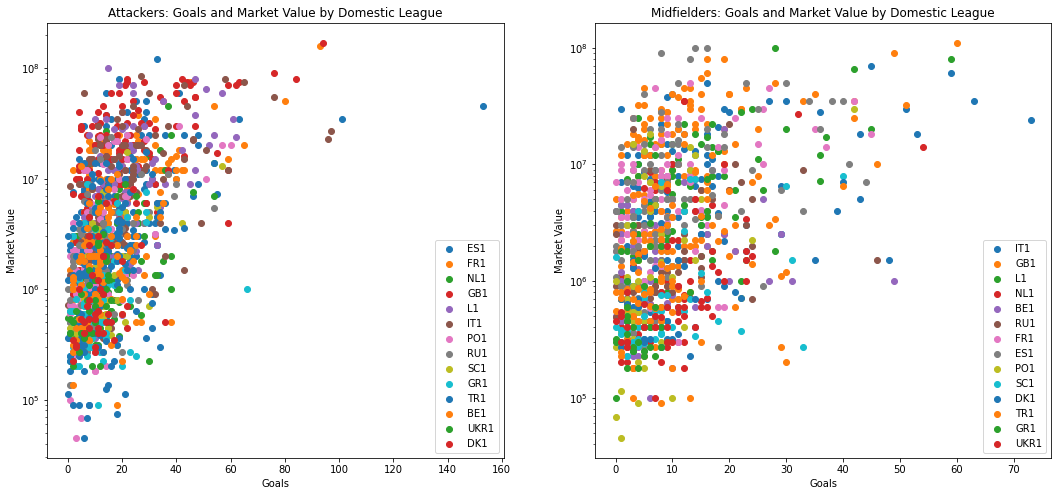

In [107]:
# plot relationship between market value and league
fig, axs = plt.subplots(1, 2, figsize=(18,8))
for league_id in attackers["domestic_competition_id"].unique():
    league = attackers.loc[attackers["domestic_competition_id"] == league_id]
    axs[0].scatter(
        league['goals'], 
        league['market_value_in_gbp'],
        label = league_id
    )
axs[0].legend()
axs[0].set_xlabel("Goals")
axs[0].set_ylabel("Market Value")
axs[0].set_yscale('log')
axs[0].set_title("Attackers: Goals and Market Value by Domestic League")

for league_id in midfielders["domestic_competition_id"].unique():
    league = midfielders.loc[midfielders["domestic_competition_id"] == league_id]
    axs[1].scatter(
        league['goal_contributions'], 
        league['market_value_in_gbp'],
        label = league_id
    )
axs[1].legend()
axs[1].set_xlabel("Goals")
axs[1].set_ylabel("Market Value")
axs[1].set_yscale('log')
axs[1].set_title("Midfielders: Goals and Market Value by Domestic League")

plt.show()

Text(0.5, 1.0, 'Average Market Value by Domestic Competition')

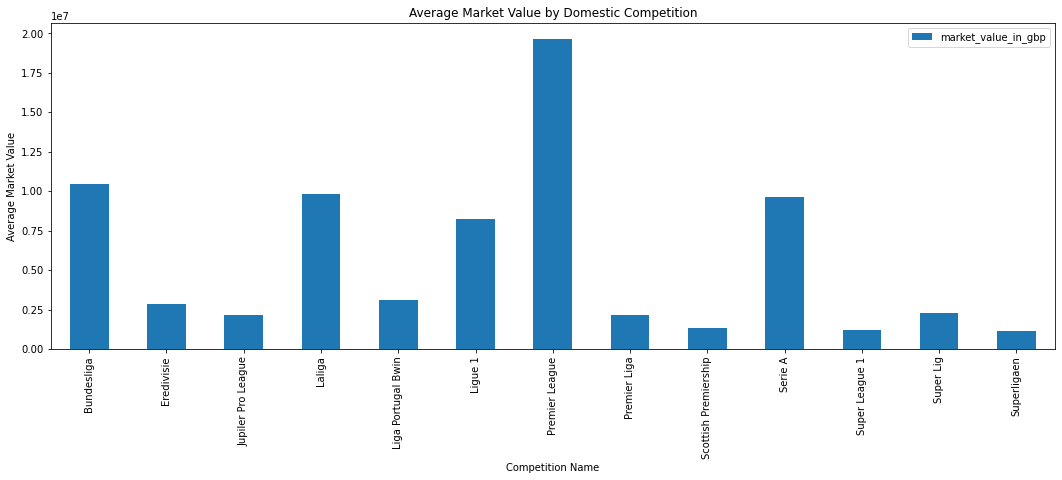

In [110]:
all_positions.groupby("competition_name").mean().plot.bar(y="market_value_in_gbp", figsize=(18, 6))
plt.ylabel("Average Market Value")
plt.xlabel("Competition Name")
plt.title("Average Market Value by Domestic Competition")

## Hypothesis
...